In [ ]:
# aprenderemos un método de aprendizaje automático llamado
# Regresión Logística que se usa para la clasificación.
# Al examinar este método, responderemos específicamente a estas tres preguntas.
# ¿Qué es la regresión logística?
# ¿Qué tipo de problemas se pueden resolver mediante regresión logística?
# ¿En qué situaciones utilizamos la regresión logística?

# La regresión logística es una técnica estadística y de aprendizaje automático para clasificar registros
# de un conjunto de datos en función de los valores de los campos de entrada.
# Digamos que tenemos un conjunto de datos de telecomunicaciones que nos gustaría
# analizar para comprender qué clientes podrían dejarnos el próximo mes.
# Se trata de datos históricos de clientes donde cada fila representa un cliente.
# Imagine que es analista de esta empresa y tiene que averiguar quién se va
# y por qué.
# Utilizará el conjunto de datos para crear un modelo basado
# en registros históricos y lo usará para predecir la rotación futura dentro del grupo de clientes.
# El conjunto de datos incluye información sobre los servicios en los que
# se ha registrado cada cliente, información de la cuenta del cliente, información demográfica
# sobre los clientes, como sexo y rango de edad, y también clientes que han dejado la empresa
# dentro del último mes.

# La regresión logística es análoga a la regresión lineal, pero intenta predecir un campo
# objetivo categórico o discreto en lugar de uno numérico.Pero en la regresión logística, 
# predecimos una variable que es binaria como sí/no, verdadero/falso,
# exitosa o no exitosa, embarazada/no embarazada,
# y así sucesivamente, todos los cuales se pueden codificar como cero o uno.

# En regresión logística, las variables independientes deben ser continuas.
# Si son categóricos, deben estar codificados como indicadores o ficticios.
# Esto significa que tenemos que transformarlos en algún valor continuo.

# Casos de uso

# Por ejemplo, para predecir la probabilidad de que una persona 
# sufra un ataque cardíaco dentro de un período de
# tiempo específico, según nuestro conocimiento de la edad,
# el sexo y el índice de masa corporal de la persona.
# O para predecir la probabilidad de mortalidad en un 
# paciente lesionado o para predecir si un paciente
# tiene una enfermedad determinada, como diabetes, en función de
# las características observadas de ese paciente, como el peso,
# la altura, la presión arterial y los resultados de varios análisis de sangre, etc.

# En un contexto de marketing, podemos usarlo para predecir 
# la probabilidad de que un cliente compre
# un producto o suspenda una suscripción, 
# como hicimos en nuestro ejemplo de abandono.

# También podemos usar la regresión logística para predecir la 
# probabilidad de falla de un proceso, sistema o producto dado. 
# Incluso podemos usarlo para predecir la probabilidad 
# de que un propietario deje de pagar una hipoteca.

In [ ]:
# La pregunta es, ¿cuándo deberíamos utilizar la regresión logística?
# Aquí hay cuatro situaciones en las que la regresión logística es un buen candidato.

# Primero, cuando el campo de destino en sus datos es categórico o específicamente es binario.

# En segundo lugar, necesita la probabilidad de su predicción.
# Por ejemplo, si desea saber cuál es la probabilidad de que un cliente compre un producto.
# La regresión logística devuelve una puntuación de probabilidad entre cero y uno para una muestra de
# datos determinada.
# De hecho, la regresión logística predice la probabilidad de esa muestra y asignamos los
# casos a una clase discreta en función de esa probabilidad.

# En tercer lugar, si sus datos se pueden separar linealmente.
# El límite de decisión de la regresión logística es una línea, un plano o un hiperplano.
# Un clasificador ordenará todos los puntos de un lado del límite de decisión como pertenecientes
# a una clase y todos los del otro lado como pertenecientes a la otra clase.

# En cuarto lugar, debe comprender el impacto de una función.
# Puede seleccionar las mejores características basándose en la significación estadística de
# los parámetros o coeficientes del modelo de regresión logística
# De hecho, nos permite comprender el impacto que tiene una variable independiente
# sobre la variable dependiente mientras controla otras variables independientes.

In [ ]:
# Función sigmoid y coste del modelo

# La función sigmoid,también llamada la función logística,se asemeja a la función de paso y
# se utiliza en la siguiente expresión en la regresión logística.
# La función sigmoid se ve un poco complicada al principio,pero no se preocupe en memorizarla
# tendrá sentido después de trabajar con ella.
# Fíjese en que en la ecuación sigmoid,cuando
# θ ^ T X se hace muy grande,el [e] ^ (-θ ^ T X) en el denominador de la fracción se convierte en
# casi cero,y el valor de la función sigmoid se acerca más a 1.
# # Si θ ^ T X es muy pequeño,la función sigmoid se acerca a cero.

# Representando en el trazado sigmoide,cuando θ ^ T X,se hace más grande,el valor de la función sigmoid
# se acerca a 1,y también,si el θ ^ T X es muy pequeño,la función sigmoid
# se acerca a cero. Por lo tanto,la salida de la función sigmoid es siempre
# entre 0 y 1,lo que hace que sea apropiado interpretar los resultados como probabilidades.
# Es obvio que cuando el resultado de la función sigmoid se acerca más a 1,la probabilidad
# de y= 1,dada x,sube,y en contraste,cuando el valor sigmoid está más cerca de cero,
# la probabilidad de y= 1,dada x,es muy pequeña.
# Entonces,¿cuál es la salida de nuestro modelo cuando usamos la función sigmoid?
# En la regresión logística,modelamos la probabilidad de que una entrada (X) pertenezca a la clase por defecto
# (Y= 1),y podemos escribirlo formalmente como,P(Y=1|X).
# También podemos escribir P (y= 0 | X) = 1-P (y= 1 |x). Por ejemplo,la probabilidad de que un cliente
# permanezca con la compañía se puede mostrar como la probabilidad de abandono es igual a 1 dado el ingreso de un cliente
# y la edad,que puede ser,por ejemplo,0.8. Y la probabilidad de abandono es 0,para el
# mismo cliente,teniendo en cuenta que los ingresos y la edad de un cliente,se puede calcular como 1-0.8 = 0.2.
# Por lo tanto,nuestro trabajo es entrenar al modelo para que establezca sus valores de parámetros de tal manera que
# nuestro modelo es una buena estimación de P (y= 1 x). De hecho,esto es lo que un buen modelo clasificador
# construida por regresión logística se supone que debe hacer por nosotros.
# Además,debe ser una buena estimación de P (y=0 x) que se puede mostrar como 1-σ (θ ^ T X).
# Ahora,la pregunta es: ¿Cómo podemos lograr esto?
# Podemos encontrar 𝜃 través del proceso de entrenamiento,así que vamos a ver cuál es dicho proceso.
# Paso 1. Inicializar el vector 𝜃 con valores aleatorios,como se hace con la mayoría de los algoritmos de aprendizaje automático,
# por ejemplo,−1 o 2.
# Paso 2. Calcule la salida del modelo,que es σ (θ ^ T X),para un cliente de muestra en el
# conjunto de formación. X en θ ^ T X son los valores de vector de característica -- para
# ,por ejemplo,la edad y los ingresos del cliente,por ejemplo [ 2,5].
# Y θ es la confianza o el peso que ha establecido en el paso anterior.
# La salida de esta ecuación es el valor de la predicción ... en otras palabras,la probabilidad
# que el cliente pertenece a la clase 1.
# Paso 3. Comparar la salida de nuestro modelo,y ^,que podría ser un valor de,digamos,0.7,
# con la etiqueta real del cliente,que es,por ejemplo,1 para abandono.
# Luego,registre la diferencia como el error de nuestro modelo para este cliente,que sería 1-0.7,
# que por supuesto es igual a 0.3. Este es el error para sólo un cliente dentro del
# conjunto de datos.
# Paso. 4. Calcular el error para todos los clientes tal como lo hicimos en los pasos anteriores,y añadimos
# estos errores. El error total es el coste de su modelo,
# y se calcula mediante la función de coste del modelo. La función de coste,por cierto,representa básicamente
# ¿Cómo calcular el error del modelo,que es la diferencia entre el real y el
# los valores pronosticados del modelo. Por lo tanto,el costo muestra lo mal que se encuentra el modelo
# estimación de las etiquetas del cliente. Por lo tanto,más bajo es el costo,mejor
# el modelo está en la estimación correcta de las etiquetas del cliente.
# Por lo tanto,lo que queremos hacer es tratar de minimizar este costo.
# Paso 5. Pero,debido a que los valores iniciales para θ fueron elegidos al azar,es muy probable
# que la función de coste es muy alta. Por lo tanto,cambiamos la forma de ser de tal manera que esperemos
# reducir el coste total.
# Paso 6. Después de cambiar los valores de θ,volvemos al paso 2.
# A continuación,empezamos otra iteración y calculamos de nuevo el coste del modelo.
# Y seguimos haciendo esos pasos una y otra vez,cambiando los valores de θ cada vez,hasta que
# el coste es lo suficientemente bajo. Por lo tanto,esto plantea dos preguntas: en primer lugar," Cómo
# ¿Podemos cambiar los valores de θ de modo que el coste se reduzca en las iteraciones? "
# Y en segundo lugar," ¿Cuándo debemos detener las iteraciones? " Hay diferentes maneras de cambiar los valores
# de θ,pero una de las formas más populares es la ascendencia gradiente.
# Además,hay varias formas de detener las iteraciones,pero esencialmente se detiene la formación mediante el cálculo
# la precisión de su modelo,y detenerlo cuando sea satisfactorio.

In [1]:
# Entrenamiento de regresión logística

# Discutiremos cómo cambiar
# los parámetros del modelo para estimar mejor el resultado.
# Finalmente, hablaremos de la función de costo y el descenso del gradiente en
# regresión logística como una forma de optimizar el modelo.

# El principal objetivo del entrenamiento y
# la regresión logística es cambiar los parámetros del modelo,
# para ser la mejor estimación de las etiquetas
# de las muestras en el conjunto de datos.


In [ ]:
# Analizemos lo siguiente

# ¿cómo minimizamos la función de coste del modelo?
# La respuesta es, usando un enfoque de optimización.
# Hay diferentes enfoques de optimización,
# pero usamos uno de los enfoques más famosos y efectivos aquí, el gradiente descendente.
# La siguiente pregunta es,
# ¿qué es el gradiente descendente?
# En general, el gradiente descendente es
# un enfoque iterativo para encontrar el mínimo de una función.
# Específicamente en nuestro caso el gradiente
# descendente es una técnica para usar la derivada de
# una función de costo para cambiar los valores de
# los parámetros para minimizar el costo o el error.
# Gradient descent is a first-order iterative optimization algorithm for 
# finding a local minimum of a differentiable function.

In [ ]:
# Regresión Logística con Python

# Aquí aprenderás Regresión Logística, para luego, crear un modelo basado 
# en datos de telecomunicaciones para predecir cuándo los clientes buscarán 
# otro competidor de forma tal de poder tomar alguna decisión para retenerlos.

# El objetivo del algoritmo de Regresión Logística, es encontrar los mejores parámetros θ, para ℎ_θ(𝑥) = 𝜎({θ^TX}), 
# de forma tal de que el modelo prediga lo mejor posible la clase de cada caso.


In [1]:
# Cliente churn con Regresión Logística

# Una compañía de telecomunicaciones está preocupada por el número de clientes 
# que dejan sus líneas fijas de negocio por las de competidores de cable. 
# Ellos necesitan entender quién se está yendo. Imagina que eres un analista 
# en esta compañía y que tienes que descubrir quién es el cliente que se va y por qué

# Primero, importemos las librerías necesarias:

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
# Acerca del set de datos

# Utilizaremos datos de las telecomunicaciones para poder predecir el cliente churn. 
# Estos son datos históricos de clientes donde cada fila representa un cliente. 
# Los datos son fáciles de comprender, y podrás descubrir conclusiones 
# que puedes usar de inmediato. Generalmente, es menos caro mantener 
# clientes que conseguir nuevos, así que el foco de este análisis es 
# predecir los clientes que se quedarían en la compañía.

# Estos datos proveen información que ayudarán a predecir comportamientos 
# que retendrán a los clientes. Puedes analizar toda la información 
# relevante del cliente y desarrollar programas de retención centrados 
# en los clientes.

# Los datos incluyen información acerca de:

# Clientes que se fueron el último mes – la columna se llama Churn
# Los servicios que cada cliente ha contratado – teléfono, líneas múltiples, 
# internet, seguridad online, resguardo online, protección de dispositivos, 
# soporte técnico y streaming de TV y películas
# Información de la cuenta del cliente - cuánto hace que es cliente, contrato, 
# método de pago, facturación digital, cargos mensuales y cargos totales
# Información demográfica de los clientes – sexo, rango de edad y si tienen 
# pareja y dependientes



In [ ]:
# Cargar los datos Churn de la Telco
# Telco Churn es un archivo de datos ficticio que trata sobre los esfuerzos de una compañía 
# de telecomunicaciones para reducir la huída de sus clientes. Cada caso corresponde a un 
# cliente y se guarda información demográfica e información referente al uso del servicio. 
# Antes de trabajar con los datos, debes utilizar la URL para obtener el archivo ChurnData.csv.

In [6]:
churn_df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv")
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [8]:
# Selección y pre-procesamiento de datos

# Seleccionemos algunas características para el modelado. 

# También cambiemos el tipo de dato del objetivo (target) 
# para que sea un número entero (integer), 
# ya que es un requerimiento del algoritmo skitlearn:


churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [11]:
# Práctica
# ¿Cuántas filas y columnas en total hay en este set de datos? ¿Cual es el nombre de las columnas?

print("En este dataset esta compuesto por : ", churn_df.shape, 'Filas y columnas respctivamente')

En este dataset esta compuesto por :  (200, 10) Filas y columnas respctivamente


In [12]:
# Definamos X, e y para nuestro set de datos:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [13]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

In [14]:
# También, normalicemos el set de datos:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [15]:
# Entrenar/Probar el set de datos
# Ahora, dividamos nuestro set de datos en dos sets, entrenamiento y prueba:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [ ]:
# Modelando (Regresión Logística con Scikit-learn)

# Construyamos nuestro modelo utilizando LogisticRegression con el package Scikit-learn. 
# Esta función implementa regresión logística y puede usar distintos optimizadores 
# numéricos para encontrar parámetros, a saber, ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. 
# Puedes también encontrar más información sobre los pros y contras de 
# estos optimizadores si buscas en internet.

# La versión de Regresión Logística en, soporta regularización. 
# Esto es, una técnica que soluciona problemas de sobreajuste en modelos de machine learning. 
# El parámetro C indica fuerza de regularización inversa la cual debe ser un número 
# flotante positivo. Valores más pequeños indican regularización más fuerte. 
# Now lets fit our model with train set:

In [16]:
# Creemos el Objeto o Instacia de clase y lo entrenamos usando la notacion del punto
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [19]:
#Ahora, podremos predecir usando nuestro set de prueba:
yhat = LR.predict(X_test)
yhat[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [21]:
y_test[0:10]

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [23]:
y[0:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
# predict_proba devuelve estimaciones para todas las clases. 
# La primer columna es la probabilidad de la clase 1, P(Y=1|X), 
# y la segunda columna es la probabilidad de la clase 0, P(Y=0|X):
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:10]

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ]])

In [35]:
# Evaluación:

# índice jaccard:

# Probemos con el índice jaccard para la evaluación de precisión. 
# Podemos definir como jaccard al tamaño de la intersección dividida 
# por el tamaño de la unión de dos set de etiquetas. Si todo el set de 
# etiquetas de muestra predichas coinciden con el set real de etiquetas, 
# entonces la precisión es 1.0; sino, sería 0.0.
from sklearn import metrics
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.375

In [ ]:
### Matriz de confusión
# Otra forma de mirar la precisión del clasificador es ver la __matriz de confusión__.

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función muestra y dibuja la matriz de confusión.
    La normalización se puede aplicar estableciendo el valor `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Matriz de confusión sin normalización
[[ 6  9]
 [ 1 24]]


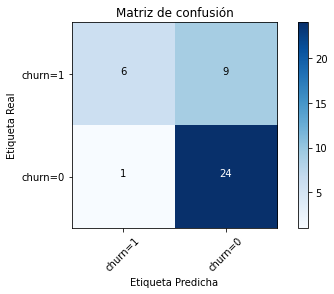

In [37]:
# Calcular la matriz de confusión
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Dibujar la matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Matriz de confusión')

In [ ]:
# Observa la primer fila. Ahí están los clientes cuyo 
# valor churn en el set de prueba es 1. Como podrás calcular, 
# de 40 clientes, el valor churn de 15 de ellos es 1. Y de otros 
# 15, el clasificador predijo que 6 de ellos son 1 y 9 0.

# Quiere decir que, para 6 clientes, el valor actual de churn fue 1 
# en el set de pruebas y el clasificador los predijo correctamente como 1. 
# Sin embargo, mientras la etiqueta actual de 9 clientes era 1, 
# el clasificador los predijo como 0, lo cual no es muy bueno. 
# Lo podemos considerar como un error del modelo para la primer fila.

# ¿Qué pasa con los clientes con valor churn 0? Miremos la segunda 
# fila. Parece que hay 25 clientes con valor churn 0.

# El clasificador predijo correctamente 24 de ellos como 0 y uno 
# de ellos equivocadamente como 1. Así que ha hecho un buen trabajo 
# prediciendo los clientes con churn 0. Una ventaja de la matriz de 
# confusión es que muestra la abilidad del modelo para correctamente 
# predecir o separar las clases. En el caso de clasificador binario, 
# como el ejemplo, podemos entender a estos números como la cantidad 
# de positivos verdaderos, negativos verdaderos y negativos falsos.

In [38]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [ ]:
# Partiendo de la cantidad de cada sección podemos calcular la precisión y el grado(recall) de cada etiqueta:

# Precision es una medida de certeza basada en una etiqueta predicha. 
# Se define de esta forma: precision = TP / (TP + FP)

# Recall es un grado positivo verdadero. 
# Se define de esta forma: Recall = TP / (TP + FN)

# Por lo tanto, podemos calcular la precisión y grado de cada clase.

# F1 score: Ahora estamos en condiciones de calcular los puntajes F1 para 
#     cada etiqueta basada en la precisión y grado de cada etiqueta.

# El puntaje F1 es el promedio armónico de la precisión y grado, donde un 
# grado F1 alcanza su mejor valor en 1 (precisión y grado perfectos) y 
# peor escenario en 0. Es una buena forma de mostrar que un clasificador 
# tiene un buen valor tanto para la precisión como para el grado.

# Y finalmente, podemos decir que la exactitud promedio para este clasificador 
# es el promedio del score f1 para ambas etiquetas, cuyo valor es is 0.72 en nuestro caso.